In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense



In [2]:
# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()



In [3]:
# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the images
X_train_flat = X_train.reshape((-1, 28 * 28))
X_test_flat = X_test.reshape((-1, 28 * 28))



In [4]:
# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [5]:
# Train the model for 3 epochs
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))


Epoch 1/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5020 - accuracy: 0.8237 - val_loss: 0.4371 - val_accuracy: 0.8438
Epoch 2/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3731 - accuracy: 0.8657 - val_loss: 0.3909 - val_accuracy: 0.8587
Epoch 3/3
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3376 - accuracy: 0.8774 - val_loss: 0.3634 - val_accuracy: 0.8703


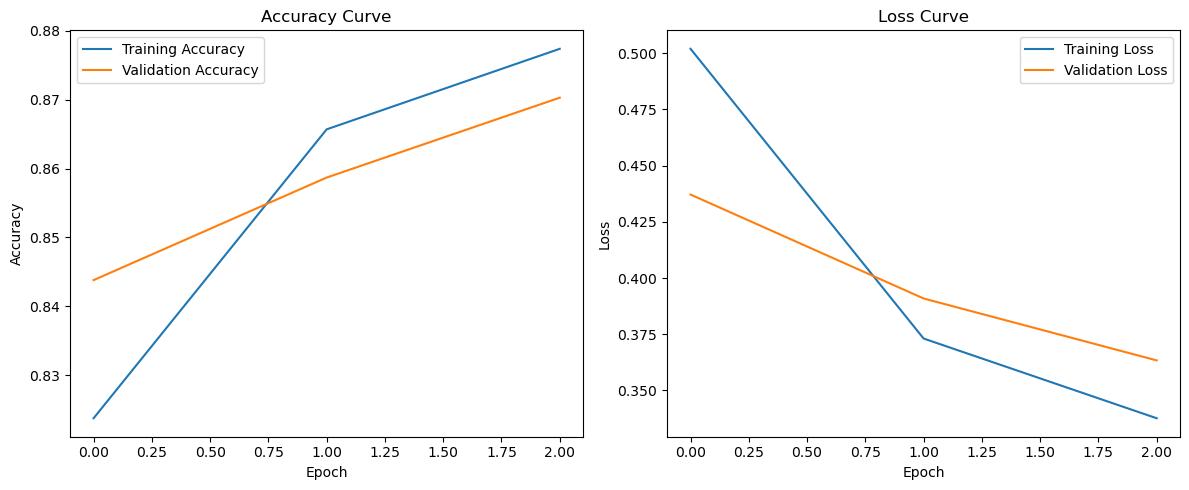

313/313 [==============================] - 2s 5ms/step - loss: 0.3634 - accuracy: 0.8703
Test Accuracy: 0.8702999949455261


In [6]:

# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


313/313 [==============================] - 1s 3ms/step


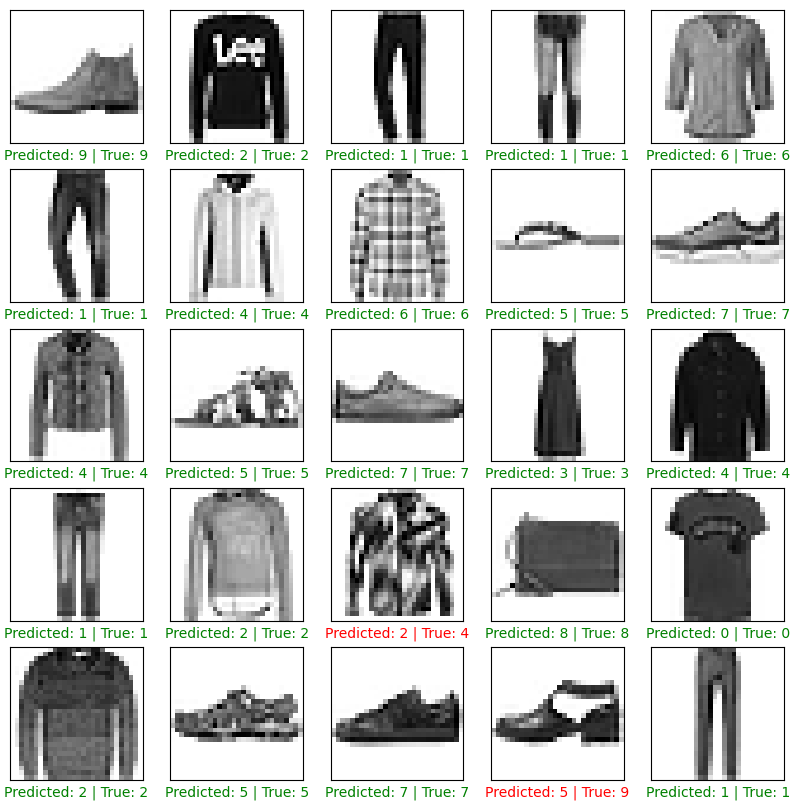

In [7]:
# Predict classes for test images
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Display some test images along with their predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = predicted_labels[i]
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'Predicted: {predicted_label} | True: {true_label}', color=color)
plt.show()


313/313 [==============================] - 1s 4ms/step


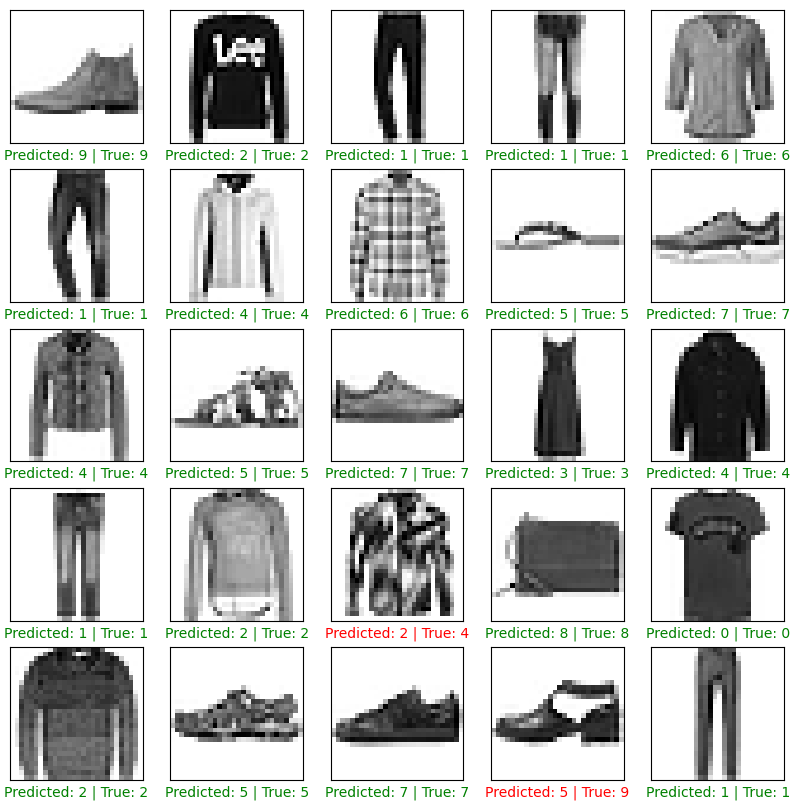

In [8]:
# Predict classes for test images using the ANN
predictions_ann = model.predict(X_test_flat)

# Convert predictions to class labels
predicted_labels_ann = np.argmax(predictions_ann, axis=1)

# Display some test images along with their predicted labels using ANN
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label_ann = predicted_labels_ann[i]
    true_label = y_test[i]
    if predicted_label_ann == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'Predicted: {predicted_label_ann} | True: {true_label}', color=color)
plt.show()
